In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aliredaelblgihy/social-media-engagement-report")

print("Path to dataset files:", path)

100%|██████████| 46.8M/46.8M [00:54<00:00, 896kB/s] 

Extracting files...


Path to dataset files: C:\Users\pabba\.cache\kagglehub\datasets\aliredaelblgihy\social-media-engagement-report\versions\1


In [3]:
path="C:/Users/pabba/.cache/kagglehub/datasets/aliredaelblgihy/social-media-engagement-report/versions/1"


In [7]:
import pandas as pd
# Load the dataset
df=pd.read_excel(path + "/social_media_engagement_data.xlsx")
df.head()

,Platform,Post ID,Post Type,Post Content,Post Timestamp,Likes,Comments,Shares,Impressions,Reach,Engagement Rate,Audience Age,Audience Gender,Audience Location,Audience Interests,Campaign ID,Sentiment,Influencer ID
0,LinkedIn,d49dadb4-fc1e-4775-88ad-d60b75cf5123,Video,Want that according same wish.,2021-04-23 08:19:49.255,415,77,85,2619,1842,31.32,29,Other,United Kingdom,respond,NaN,Negative,NaN
1,Instagram,16ce29c5-2dc7-478f-9814-a86754f3ce8b,Video,Increase fast partner south.,2023-07-30 06:40:06.356,908,125,85,1223,3884,28.78,48,Male,Greece,population,NaN,Neutral,NaN
2,Instagram,6a6cc741-72f4-4111-95a0-c5ee04a175a8,Video,Lawyer behavior born window couple sister.,2021-12-05 03:56:53.212,412,419,58,2165,849,104.71,55,Male,United States Virgin Islands,himself,NaN,Neutral,NaN
3,Twitter,0b5a3e70-c556-43cb-ad4f-a1d0003348bc,Image,Street great decade must.,2021-09-28 20:39:00.228,667,153,29,7191,3519,24.13,54,Other,Zambia,safe,NaN,NaN,NaN
4,Facebook,a7d3e958-e2fe-411e-a24a-b96e821fc050,Link,At clear meeting with reason ground continue c...,2023-02-27 17:51:21.425,659,215,34,3312,2032,44.69,33,Other,Afghanistan,well,6052b8d2-3403-4447-b0b4-c5ce20e6c8d0,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Platform            100000 non-null  object        
 1   Post ID             100000 non-null  object        
 2   Post Type           100000 non-null  object        
 3   Post Content        100000 non-null  object        
 4   Post Timestamp      100000 non-null  datetime64[ns]
 5   Likes               100000 non-null  int64         
 6   Comments            100000 non-null  int64         
 7   Shares              100000 non-null  int64         
 8   Impressions         100000 non-null  int64         
 9   Reach               100000 non-null  int64         
 10  Engagement Rate     100000 non-null  float64       
 11  Audience Age        100000 non-null  int64         
 12  Audience Gender     100000 non-null  object        
 13  Audience Location   100000 non

C:\Users\pabba\AppData\Local\Temp\ipykernel_20940\925121933.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = linkedin_df.groupby(['Weekday', 'Hour'])['Impressions'].mean().unstack()
C:\Users\pabba\AppData\Local\Temp\ipykernel_20940\925121933.py:31: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
c:\Users\pabba\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


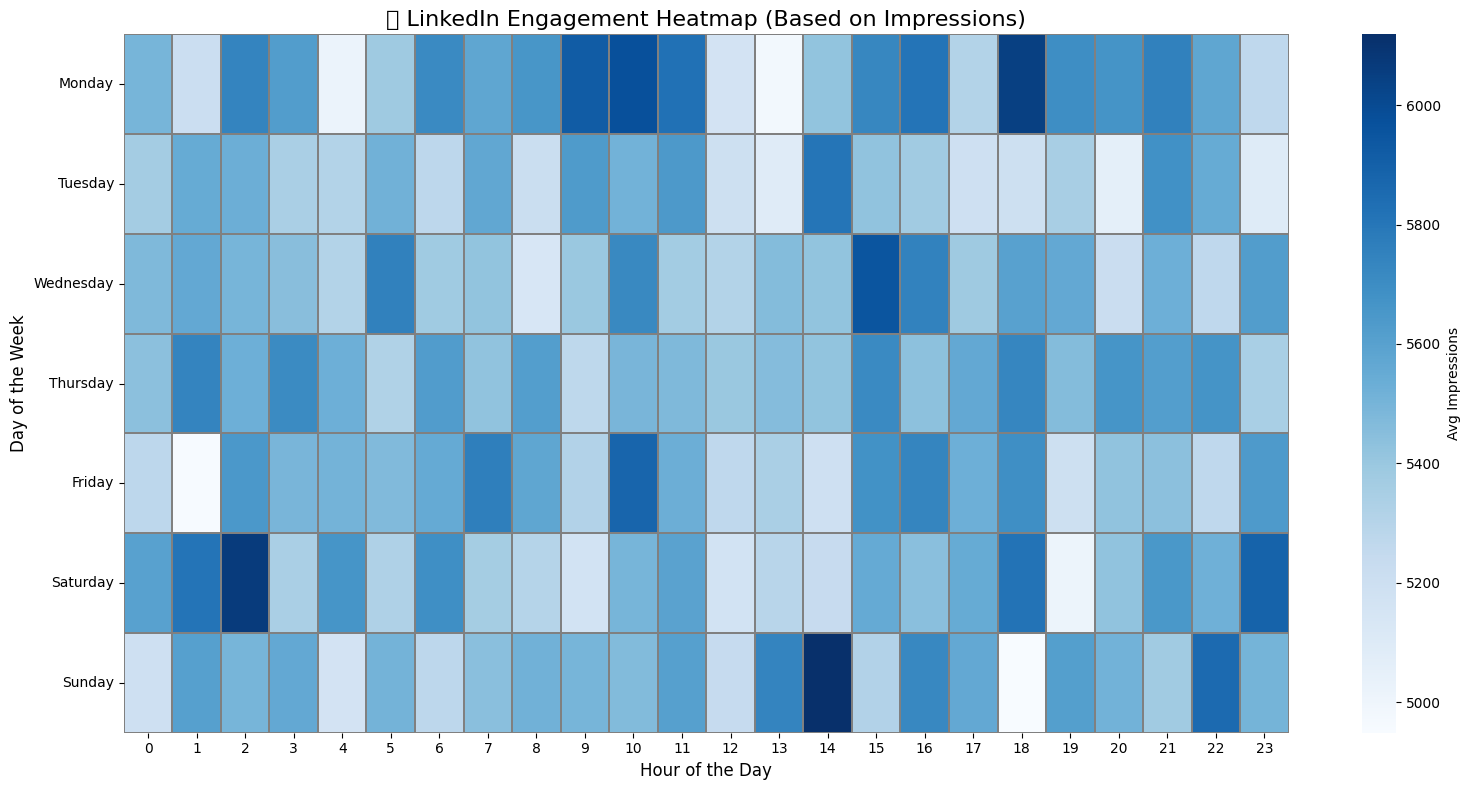

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Keep only LinkedIn posts
linkedin_df = df[df['Platform'] == 'LinkedIn'].copy()

# Convert to datetime if needed
linkedin_df['Post Timestamp'] = pd.to_datetime(linkedin_df['Post Timestamp'])

# Extract Hour and Day
linkedin_df['Hour'] = linkedin_df['Post Timestamp'].dt.hour
linkedin_df['Weekday'] = linkedin_df['Post Timestamp'].dt.day_name()

# Reorder weekdays to logical order
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
linkedin_df['Weekday'] = pd.Categorical(linkedin_df['Weekday'], categories=ordered_days, ordered=True)

# Group by Weekday and Hour
heatmap_data = linkedin_df.groupby(['Weekday', 'Hour'])['Impressions'].mean().unstack()

# Plot the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, cmap='Blues', linewidths=0.3, linecolor='gray', annot=False, cbar_kws={'label': 'Avg Impressions'})
plt.title('🔍 LinkedIn Engagement Heatmap (Based on Impressions)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Day of the Week', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


C:\Users\pabba\AppData\Local\Temp\ipykernel_20940\3425353353.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = linkedin_df.groupby(['Weekday', 'Hour'])['Impressions'].mean().unstack()
C:\Users\pabba\AppData\Local\Temp\ipykernel_20940\3425353353.py:50: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\pabba\AppData\Local\Temp\ipykernel_20940\3425353353.py:50: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from current font.
  plt.tight_layout()
c:\Users\pabba\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\pabba\AppData\Local\Programs\Python\Python311\Lib\site-p

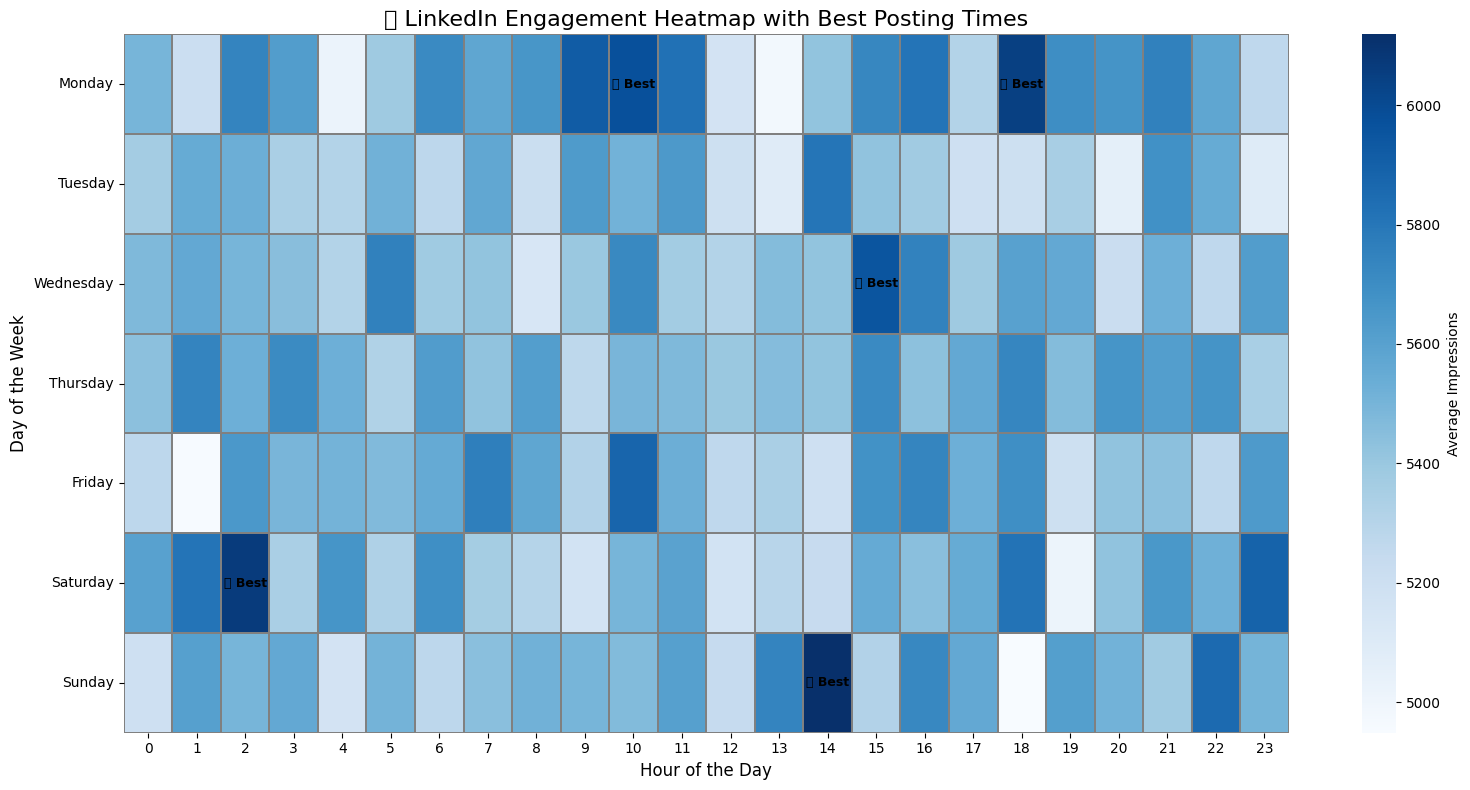

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Filter for LinkedIn posts only
linkedin_df = df[df['Platform'] == 'LinkedIn'].copy()

# Ensure timestamp is in datetime format
linkedin_df['Post Timestamp'] = pd.to_datetime(linkedin_df['Post Timestamp'])

# Extract hour and weekday
linkedin_df['Hour'] = linkedin_df['Post Timestamp'].dt.hour
linkedin_df['Weekday'] = linkedin_df['Post Timestamp'].dt.day_name()

# Order weekdays logically
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
linkedin_df['Weekday'] = pd.Categorical(linkedin_df['Weekday'], categories=ordered_days, ordered=True)

# Group by weekday and hour to calculate average impressions
heatmap_data = linkedin_df.groupby(['Weekday', 'Hour'])['Impressions'].mean().unstack()

# Find top 5 best performing time slots
top_slots = heatmap_data.stack().sort_values(ascending=False).head(5)
top_coords = [(index[0], index[1]) for index in top_slots.index]

# Plot
plt.figure(figsize=(16, 8))
ax = sns.heatmap(
    heatmap_data,
    cmap='Blues',
    linewidths=0.3,
    linecolor='gray',
    annot=False,
    cbar_kws={'label': 'Average Impressions'}
)

# Highlight top 5 slots with annotations
for (day, hour) in top_coords:
    day_index = ordered_days.index(day)
    ax.text(hour + 0.5, day_index + 0.5, '🟢 Best', 
            ha='center', va='center', color='black', fontsize=9, fontweight='bold')

# Labels and Title
plt.title('📊 LinkedIn Engagement Heatmap with Best Posting Times', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Day of the Week', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


C:\Users\pabba\AppData\Local\Temp\ipykernel_20940\2433391280.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_trend = linkedin_df.groupby(['Weekday', 'Hour'])['Impressions'].mean().reset_index()
c:\Users\pabba\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pabba\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pa

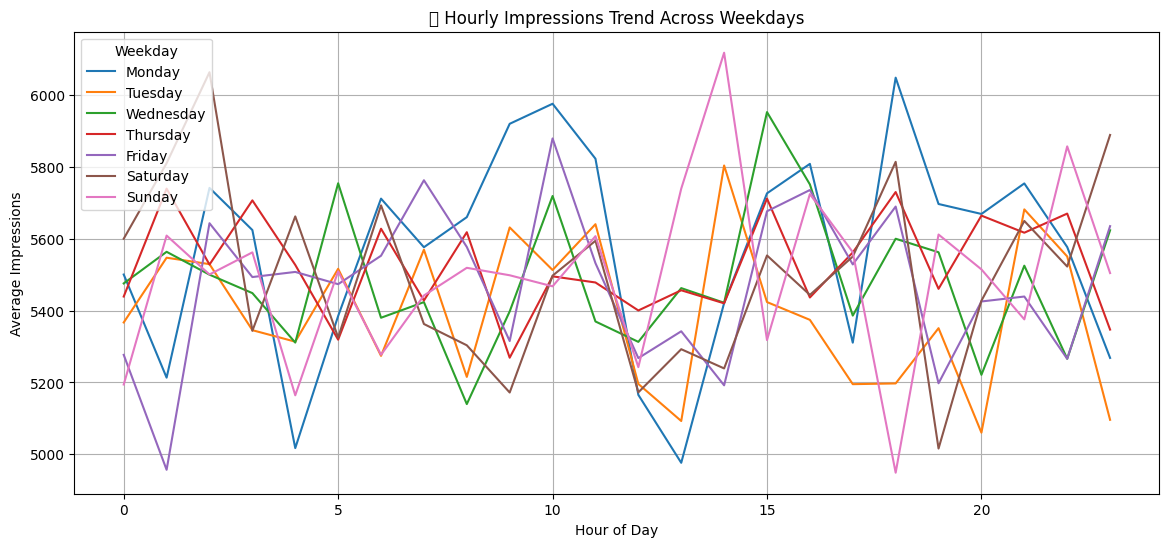

In [12]:
hourly_trend = linkedin_df.groupby(['Weekday', 'Hour'])['Impressions'].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(data=hourly_trend, x='Hour', y='Impressions', hue='Weekday', palette='tab10')
plt.title('📈 Hourly Impressions Trend Across Weekdays')
plt.xlabel('Hour of Day')
plt.ylabel('Average Impressions')
plt.grid(True)
plt.show()


c:\Users\pabba\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pabba\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pabba\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pabba\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

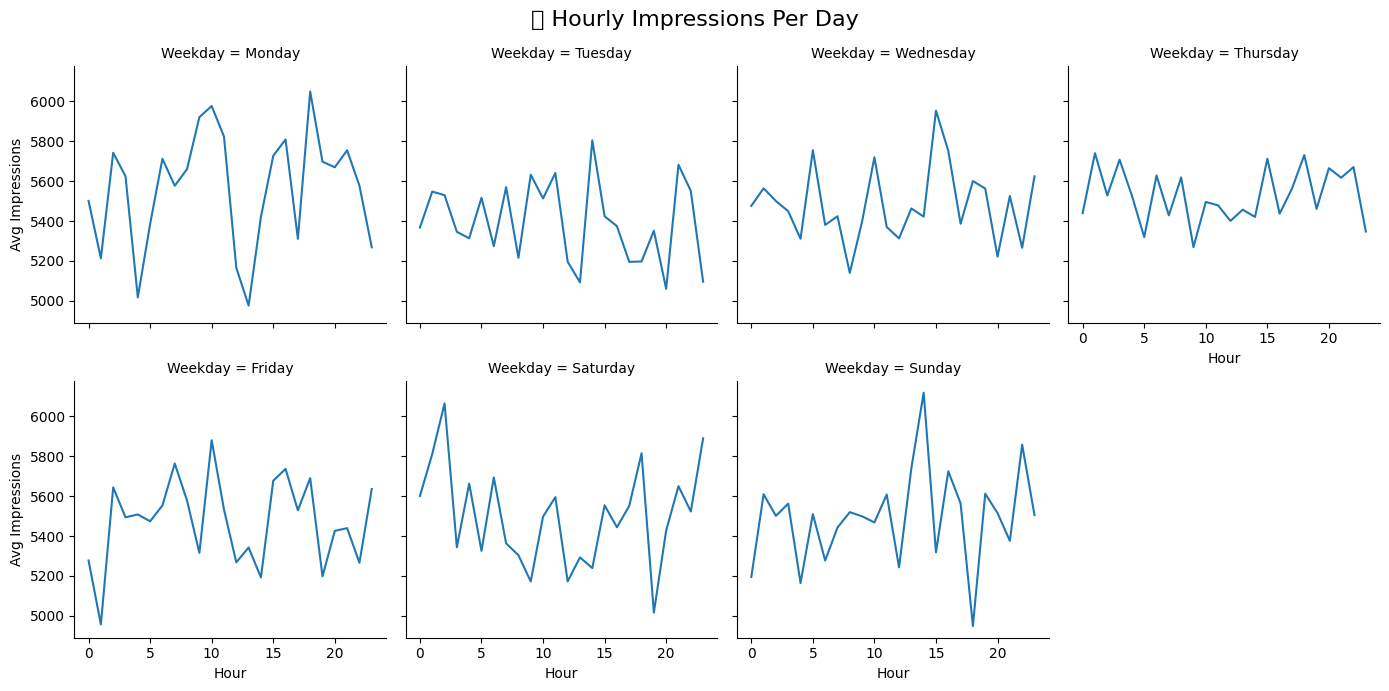

In [13]:
g = sns.FacetGrid(hourly_trend, col='Weekday', col_wrap=4, height=3.5, sharey=True)
g.map(sns.lineplot, 'Hour', 'Impressions')
g.fig.suptitle('📊 Hourly Impressions Per Day', fontsize=16)
g.set_axis_labels('Hour', 'Avg Impressions')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


C:\Users\pabba\AppData\Local\Temp\ipykernel_20940\532088739.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  engagement_data = linkedin_df.groupby(['Weekday', 'Hour'])['Engagement Rate'].mean().unstack()
C:\Users\pabba\AppData\Local\Temp\ipykernel_20940\532088739.py:8: UserWarning: Glyph 128156 (\N{PURPLE HEART}) missing from current font.
  plt.tight_layout()
c:\Users\pabba\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128156 (\N{PURPLE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


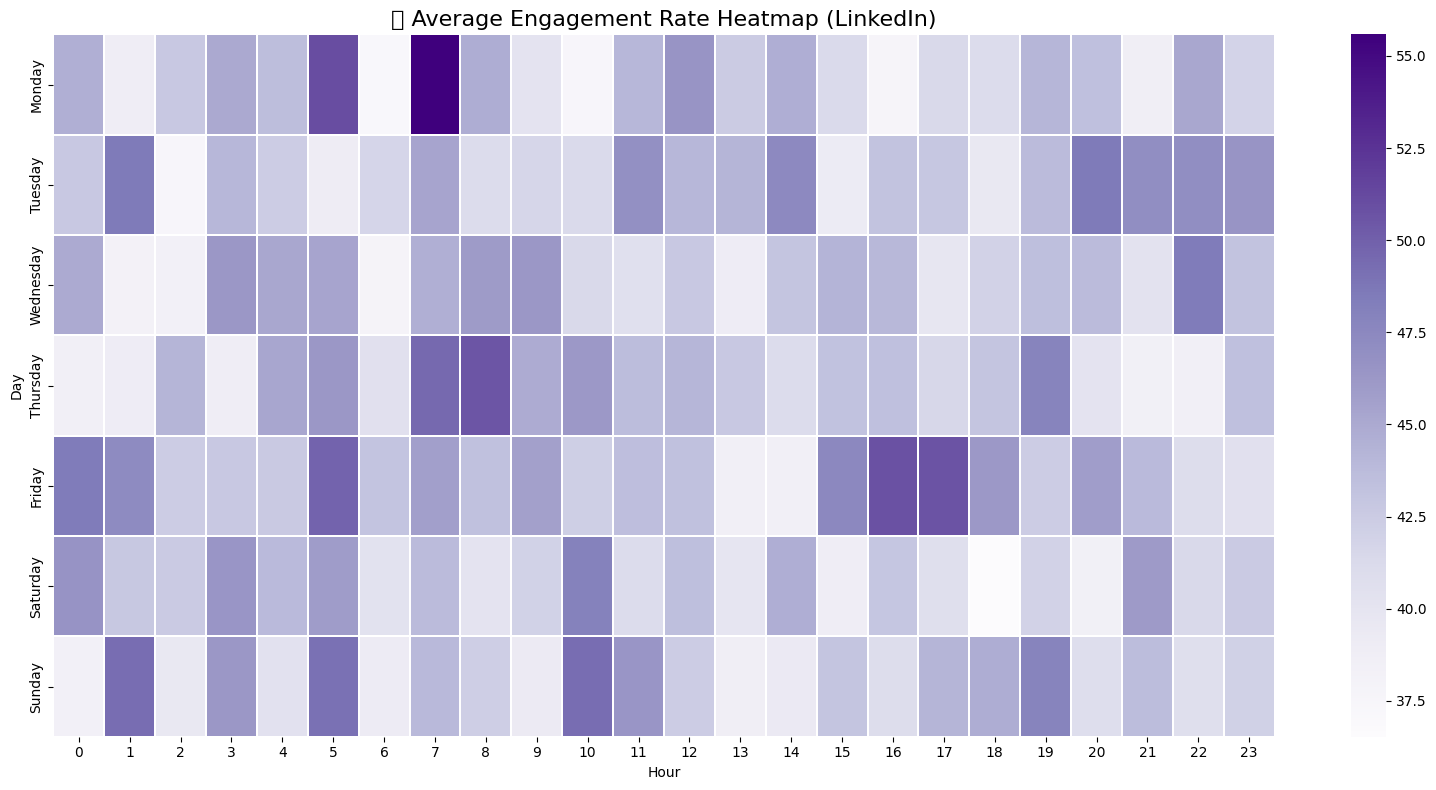

In [15]:
engagement_data = linkedin_df.groupby(['Weekday', 'Hour'])['Engagement Rate'].mean().unstack()

plt.figure(figsize=(16, 8))
sns.heatmap(engagement_data, cmap='Purples', annot=False, linewidths=0.3)
plt.title('💜 Average Engagement Rate Heatmap (LinkedIn)', fontsize=16)
plt.xlabel('Hour')
plt.ylabel('Day')
plt.tight_layout()
plt.show()


c:\Users\pabba\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


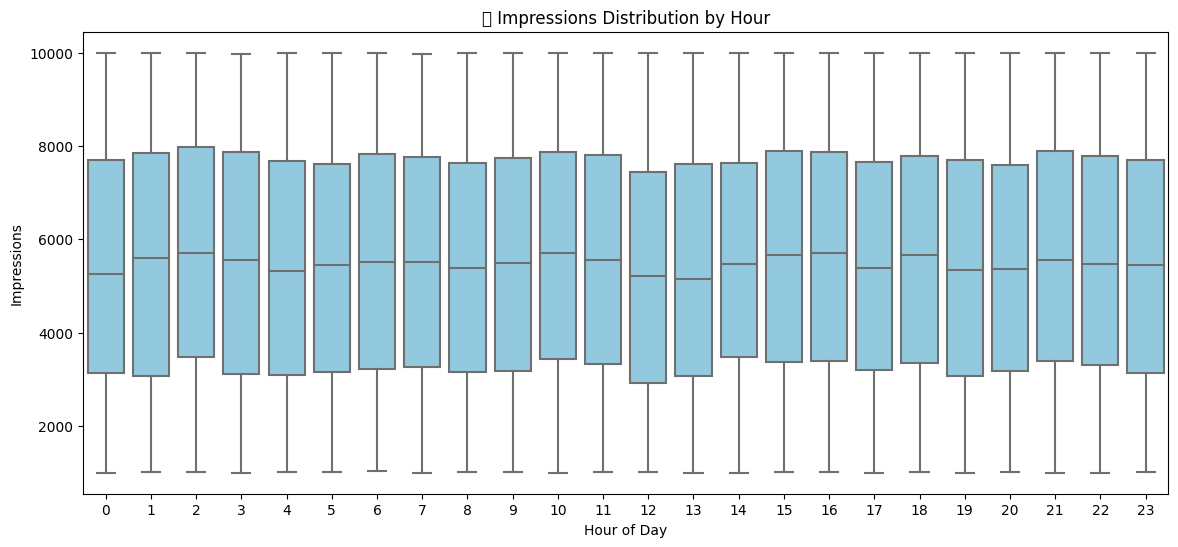

In [16]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=linkedin_df, x='Hour', y='Impressions', color='skyblue')
plt.title('📦 Impressions Distribution by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Impressions')
plt.show()
